**Hesed Guwn**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 6A: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\hekaj\AppData\Local\Temp\ipykernel_18824\1135383004.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
C:\Users\hekaj\AppData\Local\Temp\ipykernel_18824\1135383004.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

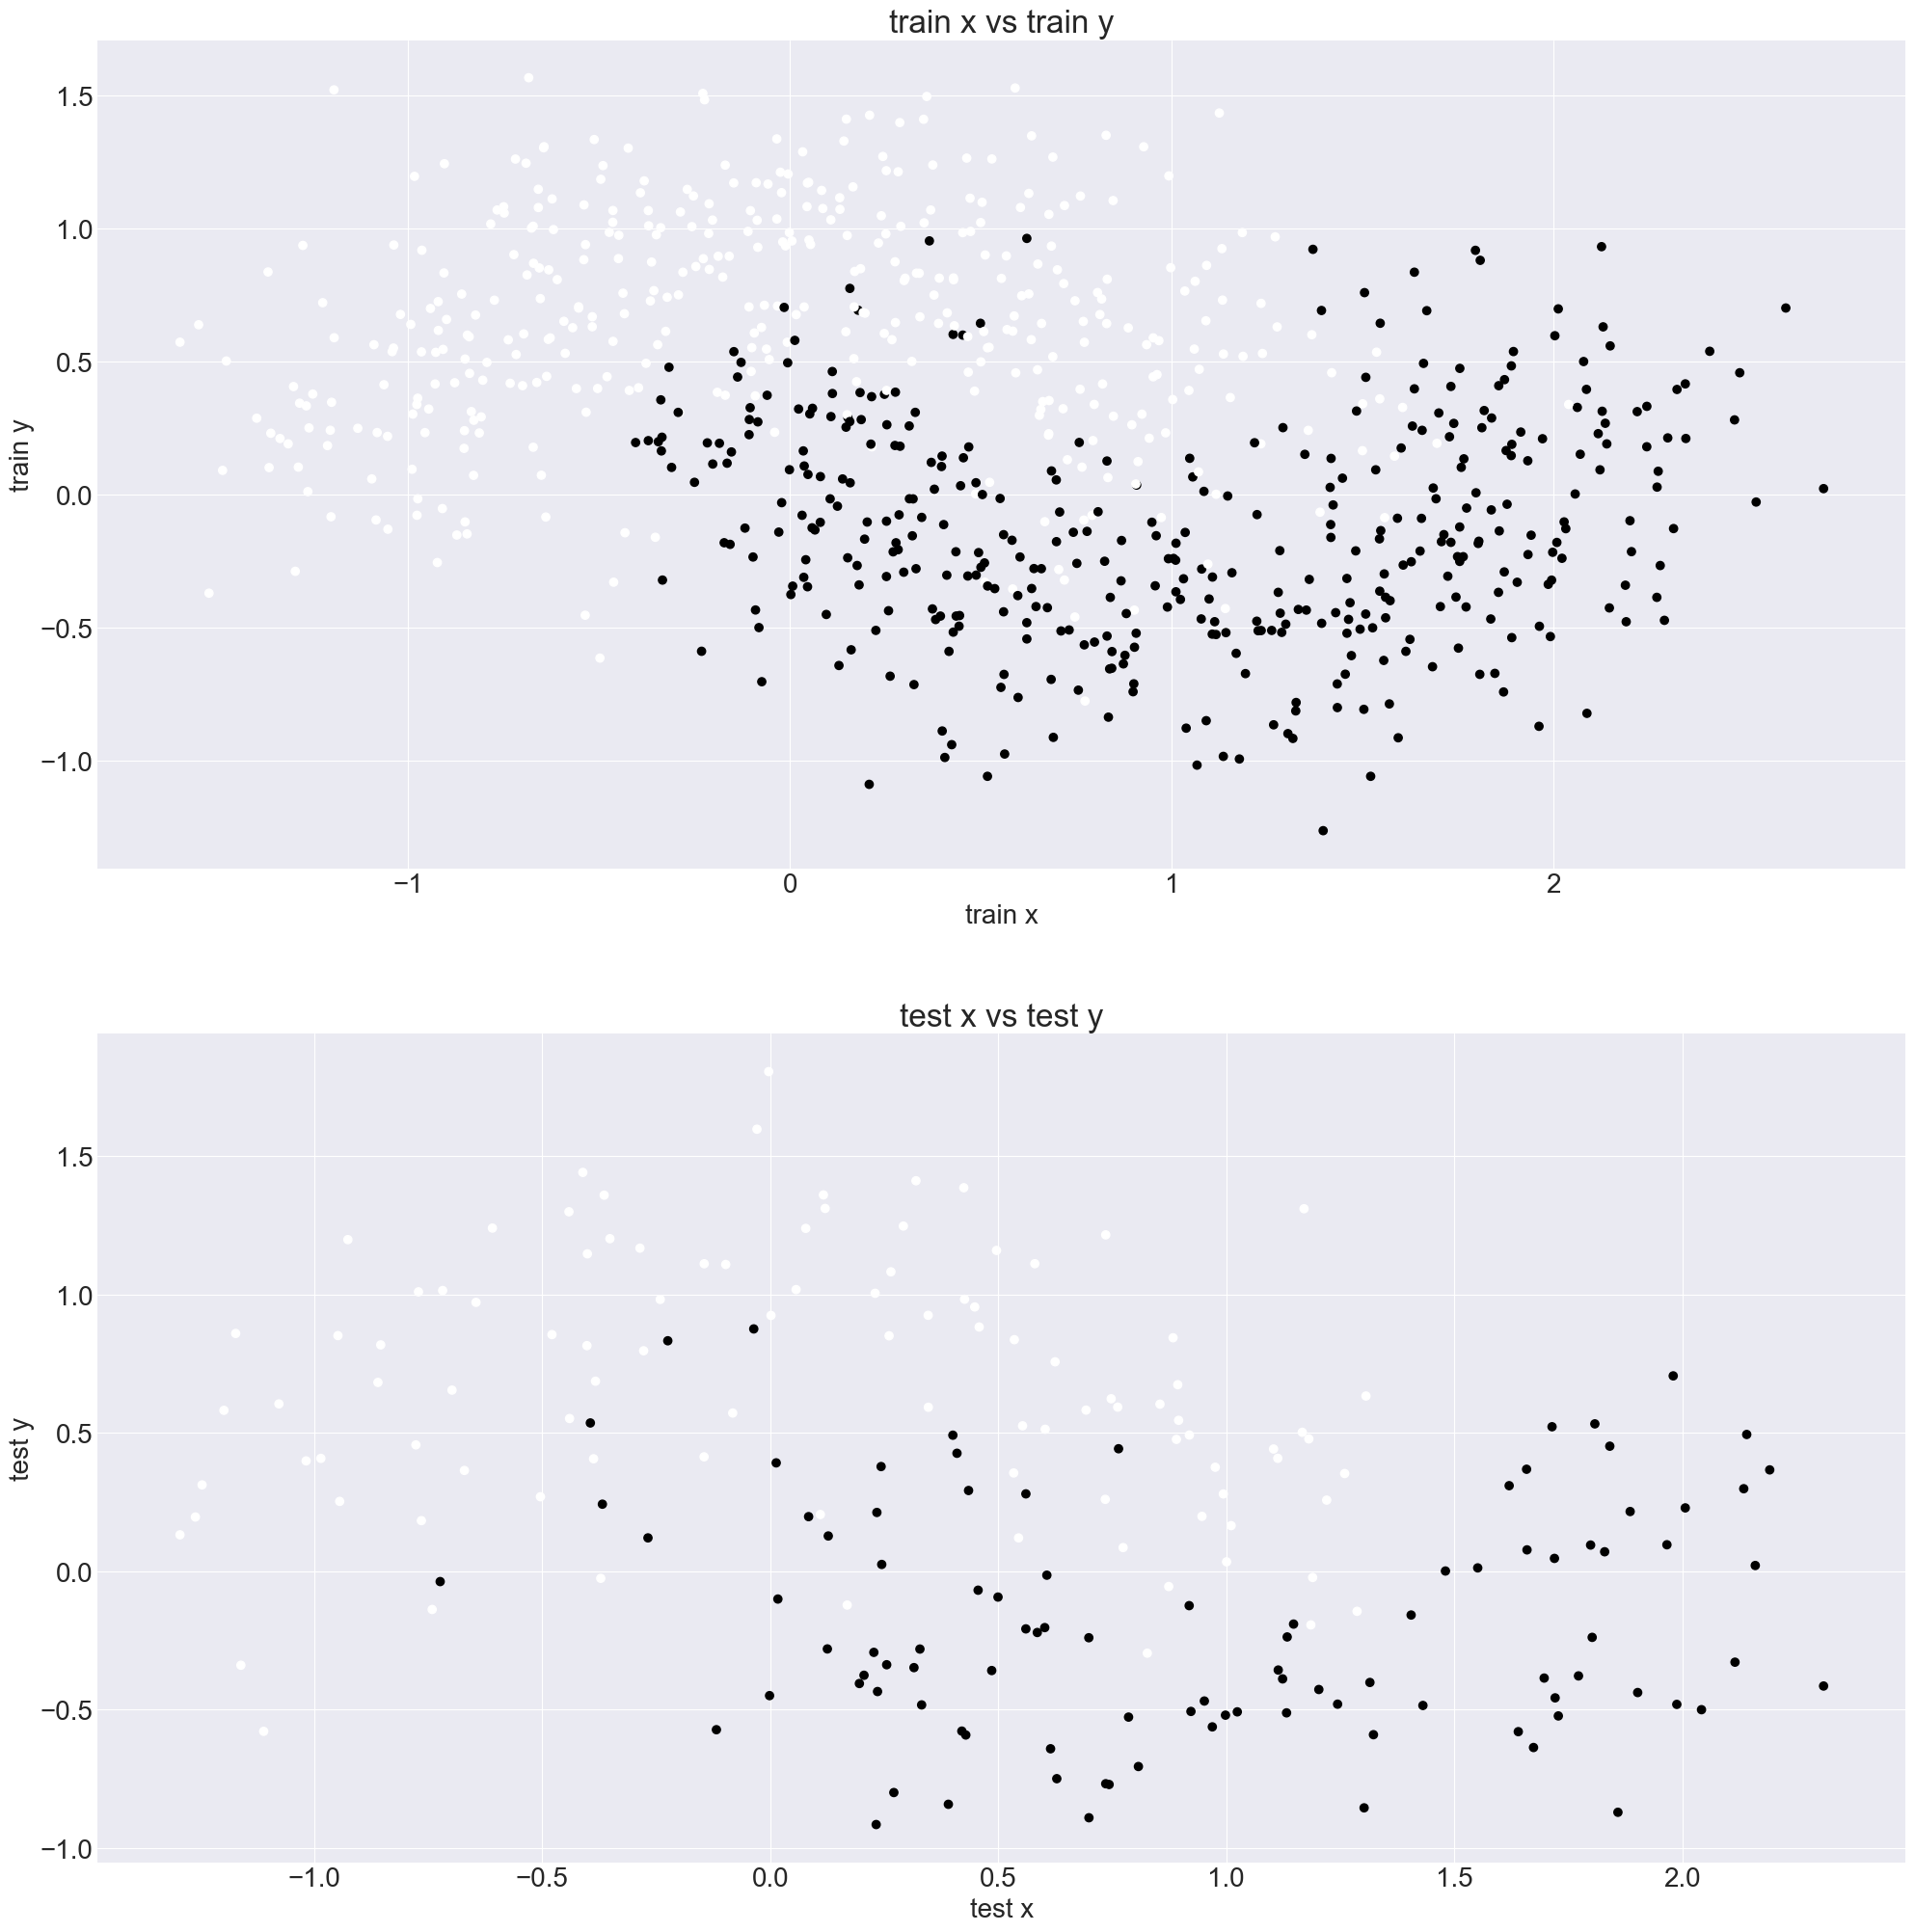

In [62]:
file1 = "data/file_train.csv"
file2 = "data/file_test.csv"

train = pd.read_csv(file1,header = None)
test = pd.read_csv(file2, header = None)

fig, axs = plt.subplots(2, figsize = (10,10))
axs[0].set_title("train x vs train y")
axs[0].set_xlabel('train x')
axs[0].set_ylabel('train y')
axs[0].scatter(train.iloc[:,0], train.iloc[:,1],c = train.iloc[:,2])

axs[1].set_title("test x vs test y")
axs[1].set_xlabel('test x')
axs[1].set_ylabel('test y')
axs[1].scatter(test.iloc[:,0], test.iloc[:,1],c = test.iloc[:,2])

plt.subplots_adjust(top = 2, right = 2)

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [63]:
k_nearest = neighbors.KNeighborsClassifier(n_neighbors = 10)

x = train.iloc[:,:2]
x2 = test.iloc[:,:2]
print(str(x.shape))

fits = k_nearest.fit(x,train.iloc[:,2])

accuracy = fits.score(x2, test.iloc[:,2])

print("My accuracy: " + str(accuracy))
print("Your accuracy should be 0.92")

(800, 2)
My accuracy: 0.92
Your accuracy should be 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

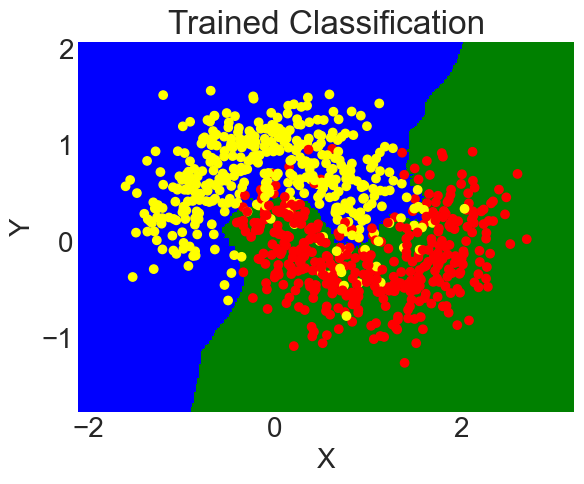

In [64]:
x_samples = np.linspace(train.iloc[:,0].min() -.5 ,train.iloc[:,0].max() + .5, 300)
y_samples = np.linspace(train.iloc[:,1].min()-.5, train.iloc[:,1].max()+ .5, 300)

x, y = np.meshgrid(x_samples, y_samples)

x_flat = x.flatten()
y_flat = y.flatten()

stack = np.column_stack((x_flat, y_flat))

coord = k_nearest.predict(stack).reshape(x.shape)


class1_color = 'yellow'
class2_color = 'red'
class1_contrast = 'blue'
class2_contrast = 'green'

colors = ListedColormap([class1_color, class2_color])
contrast = ListedColormap([class1_contrast, class2_contrast])

plt.pcolormesh(x_samples, y_samples, coord, cmap = contrast)

plt.scatter(train.iloc[:,0], train.iloc[:,1], c = train.iloc[:,2], cmap = colors)
plt.title("Trained Classification")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()